In [1]:
%matplotlib inline

In [2]:
import os
import sys

In [3]:
print sys.version

2.7.14 (default, Feb 15 2018, 20:22:28) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
import pymatgen as mg

/usr/local/lib/python2.7/site-packages/pymatgen/__init__.py:87: UserWarning: 
Pymatgen will drop Py2k support from v2019.1.1. Pls consult the documentation
at https://www.pymatgen.org for more details.
  at https://www.pymatgen.org for more details.""")


In [6]:
from dataload import load_features

### Load data

In [7]:
DATA_DIR = './data'

In [24]:
train, test = load_features(DATA_DIR, with_ext=True, with_geo=False)

Column heading definitions:
- `natoms` is the number of atoms
- `al`, `ga` and `in` are the fractions of the respective elements
- Lattice vectors are now `a`, `b` and `c` in Angstroms
- Angles are `alpha`, `beta` and `gamma` in degrees
- `E0` is the formation energy in eV per atom
- `bandgap` is the bandgap in eV
- `avg_elec` is average electronegativity of metal atoms
- `avg_mass` is average mass of all atoms in unit cell
- `o_cnt` is number of oxygen atoms
- `avg_ea` and `avg_ip` are average electron affinity and ionization potentials of metal atoms
- `avg_rs_max`, `avg_rp_max` and `avg_rd_max` are average sizes of *s*, *p* and *d*-orbitals of metal atoms

In [25]:
train.head()

,id,spacegroup,natoms,al,ga,in,a,b,c,alpha,...,avg_rp_max,avg_rd_max,spacegroup_natoms,cellvol,atom_density,mass_density,alpha_r,beta_r,gamma_r,o_fraction
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,...,1.436250,2.753750,33_80,781.052081,0.102426,0.034317,1.570842,1.570836,1.570826,0.6
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,...,1.436250,2.753750,194_80,782.500110,0.102236,0.034254,1.571121,1.570761,2.094439,0.6
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,...,1.468125,2.931875,227_40,391.227531,0.102242,0.060317,1.587705,1.590393,0.532648,0.6
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,...,1.472500,2.817500,167_30,293.377334,0.102257,0.099448,1.570601,1.571004,2.094425,0.6
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,...,1.352500,2.077500,194_80,944.713843,0.084682,0.046843,1.570727,1.570807,2.094208,0.6


In [26]:
test.head()

,id,spacegroup,natoms,al,ga,in,a,b,c,alpha,...,avg_rp_max,avg_rd_max,spacegroup_natoms,cellvol,atom_density,mass_density,alpha_r,beta_r,gamma_r,o_fraction
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,...,1.382500,2.262500,33_80,915.347470,0.087399,0.044228,1.570791,1.570802,1.570807,0.6
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,...,1.457500,2.872500,33_80,767.917987,0.104178,0.032121,1.570863,1.570836,1.570823,0.6
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,...,1.453333,2.756667,167_30,289.624655,0.103582,0.100466,1.570622,1.570987,2.094420,0.6
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,...,1.425625,2.694375,12_80,818.126773,0.097784,0.034068,1.570788,1.812666,1.570800,0.6
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,...,1.380625,2.269375,12_80,923.997043,0.086580,0.043204,1.570796,1.825490,1.570798,0.6


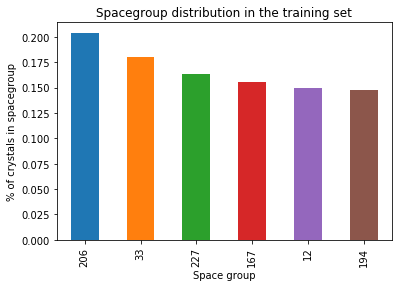

In [27]:
train['spacegroup'].value_counts(normalize=True).plot.bar()
plt.title('Spacegroup distribution in the training set')
plt.ylabel('% of crystals in spacegroup')
plt.xlabel('Space group');

#### Plots of cell parameters by spacegroup

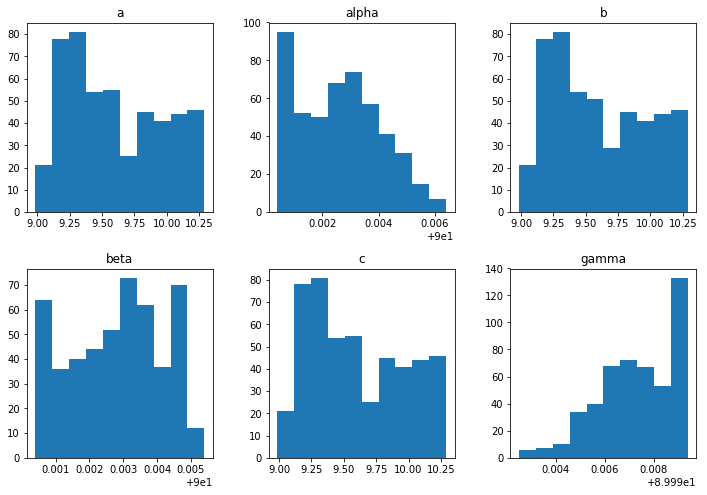

In [28]:
train[train['spacegroup'] == 206].hist(figsize = (12, 8), grid=False,
                                      column = ['a', 'b', 'c', 'alpha', 'beta', 'gamma'],
                                      layout = (2, 3));

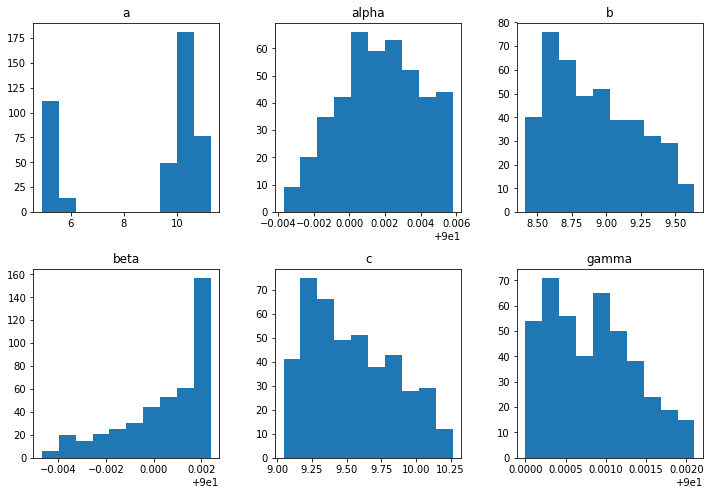

In [29]:
train[train['spacegroup'] == 33].hist(figsize = (12, 8), grid=False,
                                      column = ['a', 'b', 'c', 'alpha', 'beta', 'gamma'],
                                      layout = (2, 3));

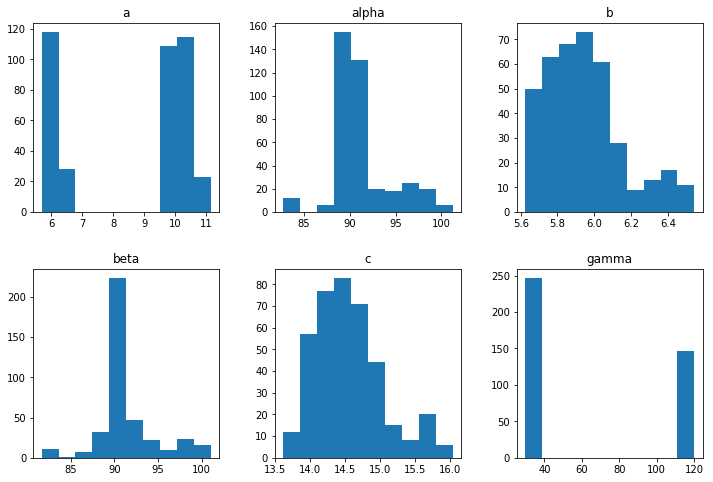

In [30]:
train[train['spacegroup'] == 227].hist(figsize = (12, 8), grid=False,
                                      column = ['a', 'b', 'c', 'alpha', 'beta', 'gamma'],
                                      layout = (2, 3));

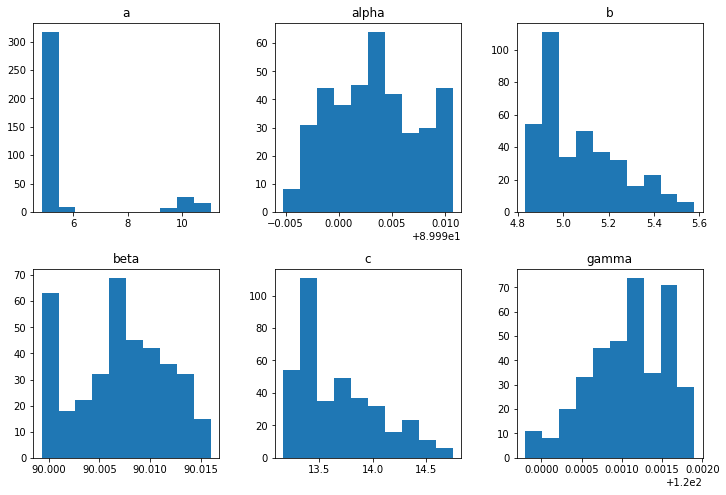

In [31]:
train[train['spacegroup'] == 167].hist(figsize = (12, 8), grid=False,
                                      column = ['a', 'b', 'c', 'alpha', 'beta', 'gamma'],
                                      layout = (2, 3));

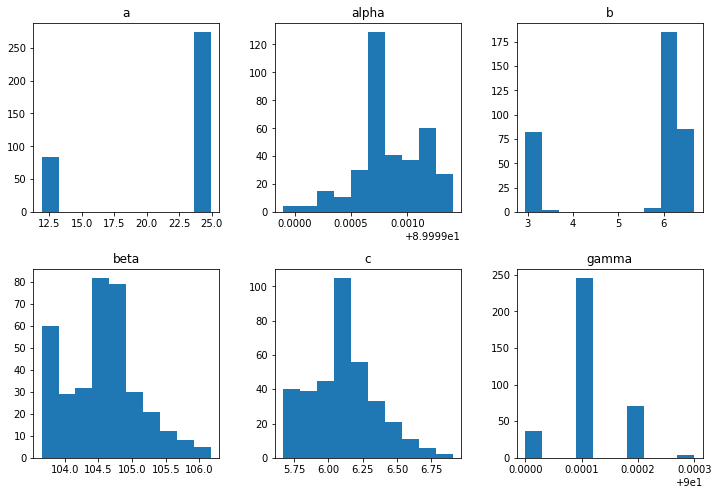

In [32]:
train[train['spacegroup'] == 12].hist(figsize = (12, 8), grid=False,
                                      column = ['a', 'b', 'c', 'alpha', 'beta', 'gamma'],
                                      layout = (2, 3));

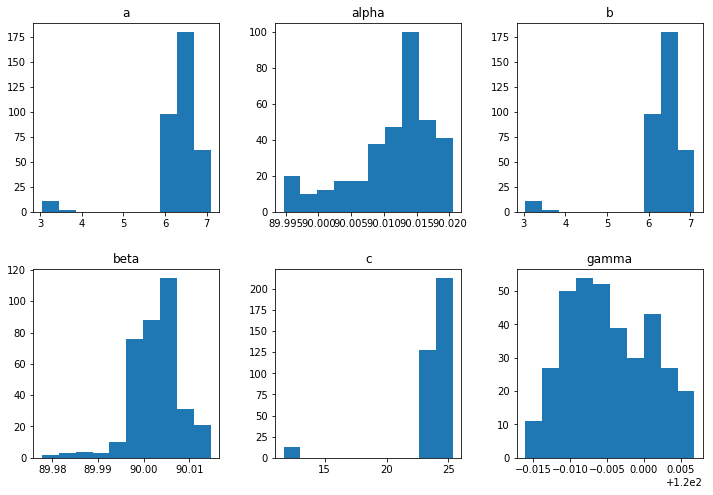

In [33]:
train[train['spacegroup'] == 194].hist(figsize = (12, 8), grid=False,
                                      column = ['a', 'b', 'c', 'alpha', 'beta', 'gamma'],
                                      layout = (2, 3));

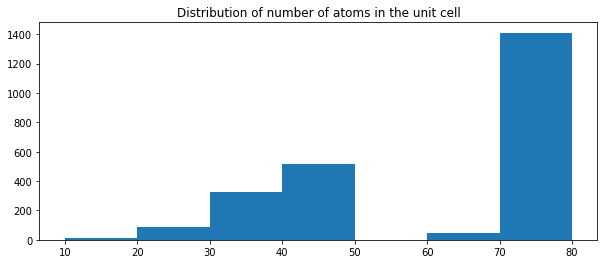

In [34]:
train['natoms'].hist(figsize = (10, 4), grid=False, bins=7)
plt.title('Distribution of number of atoms in the unit cell');

#### Plots of bandgap and formation energy distributions

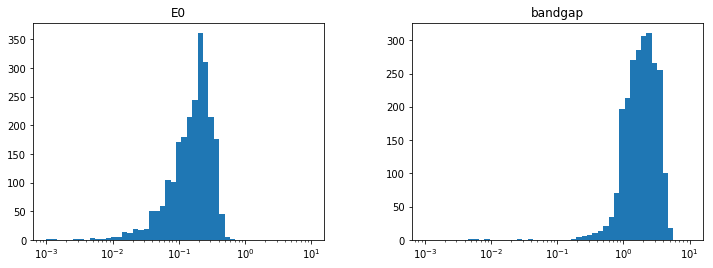

In [35]:
train[['E0', 'bandgap']].hist(figsize = (12, 4),
                              bins = 10 ** np.linspace(np.log10(0.001), np.log10(10), 50),
                              grid=False)
[a.set_xscale("log") for a in plt.gcf().get_axes()];

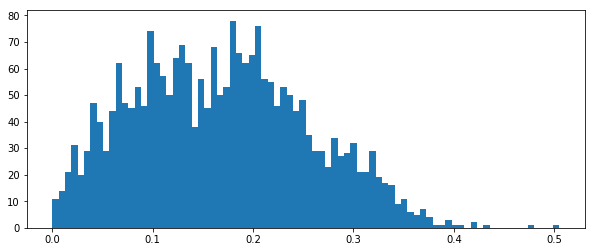

In [36]:
np.log1p(train['E0']).hist(figsize = (10, 4), bins = 80, grid=False);

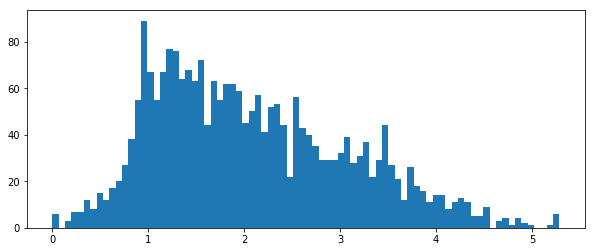

In [37]:
train['bandgap'].hist(figsize = (10, 4), bins = 80, grid=False);

#### Other parameter distribtions

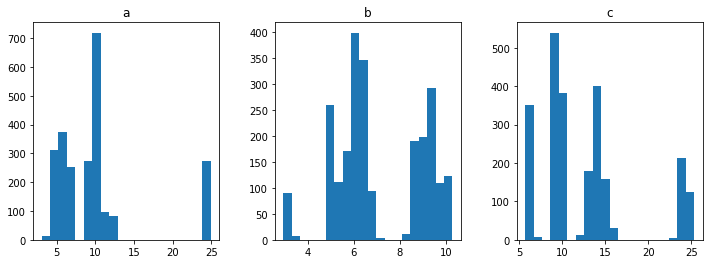

In [38]:
train[['a', 'b', 'c']].hist(figsize = (12, 4),
                            bins=20, grid=False,
                            layout=(1,3));

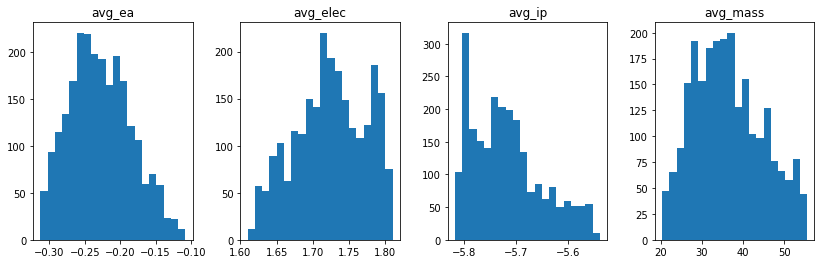

In [39]:
train[['avg_elec', 'avg_mass', 'avg_ea', 'avg_ip']].hist(figsize = (14, 4),
                                                         bins=20, grid=False,
                                                         layout=(1,4));

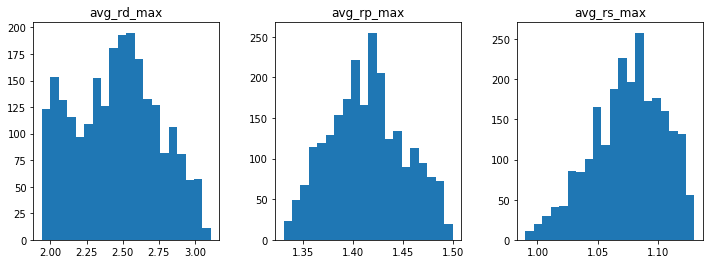

In [40]:
train[['avg_rs_max', 'avg_rp_max', 'avg_rd_max']].hist(figsize = (12, 4),
                                                       bins=20, grid=False,
                                                       layout=(1,3));

#### Pair plots

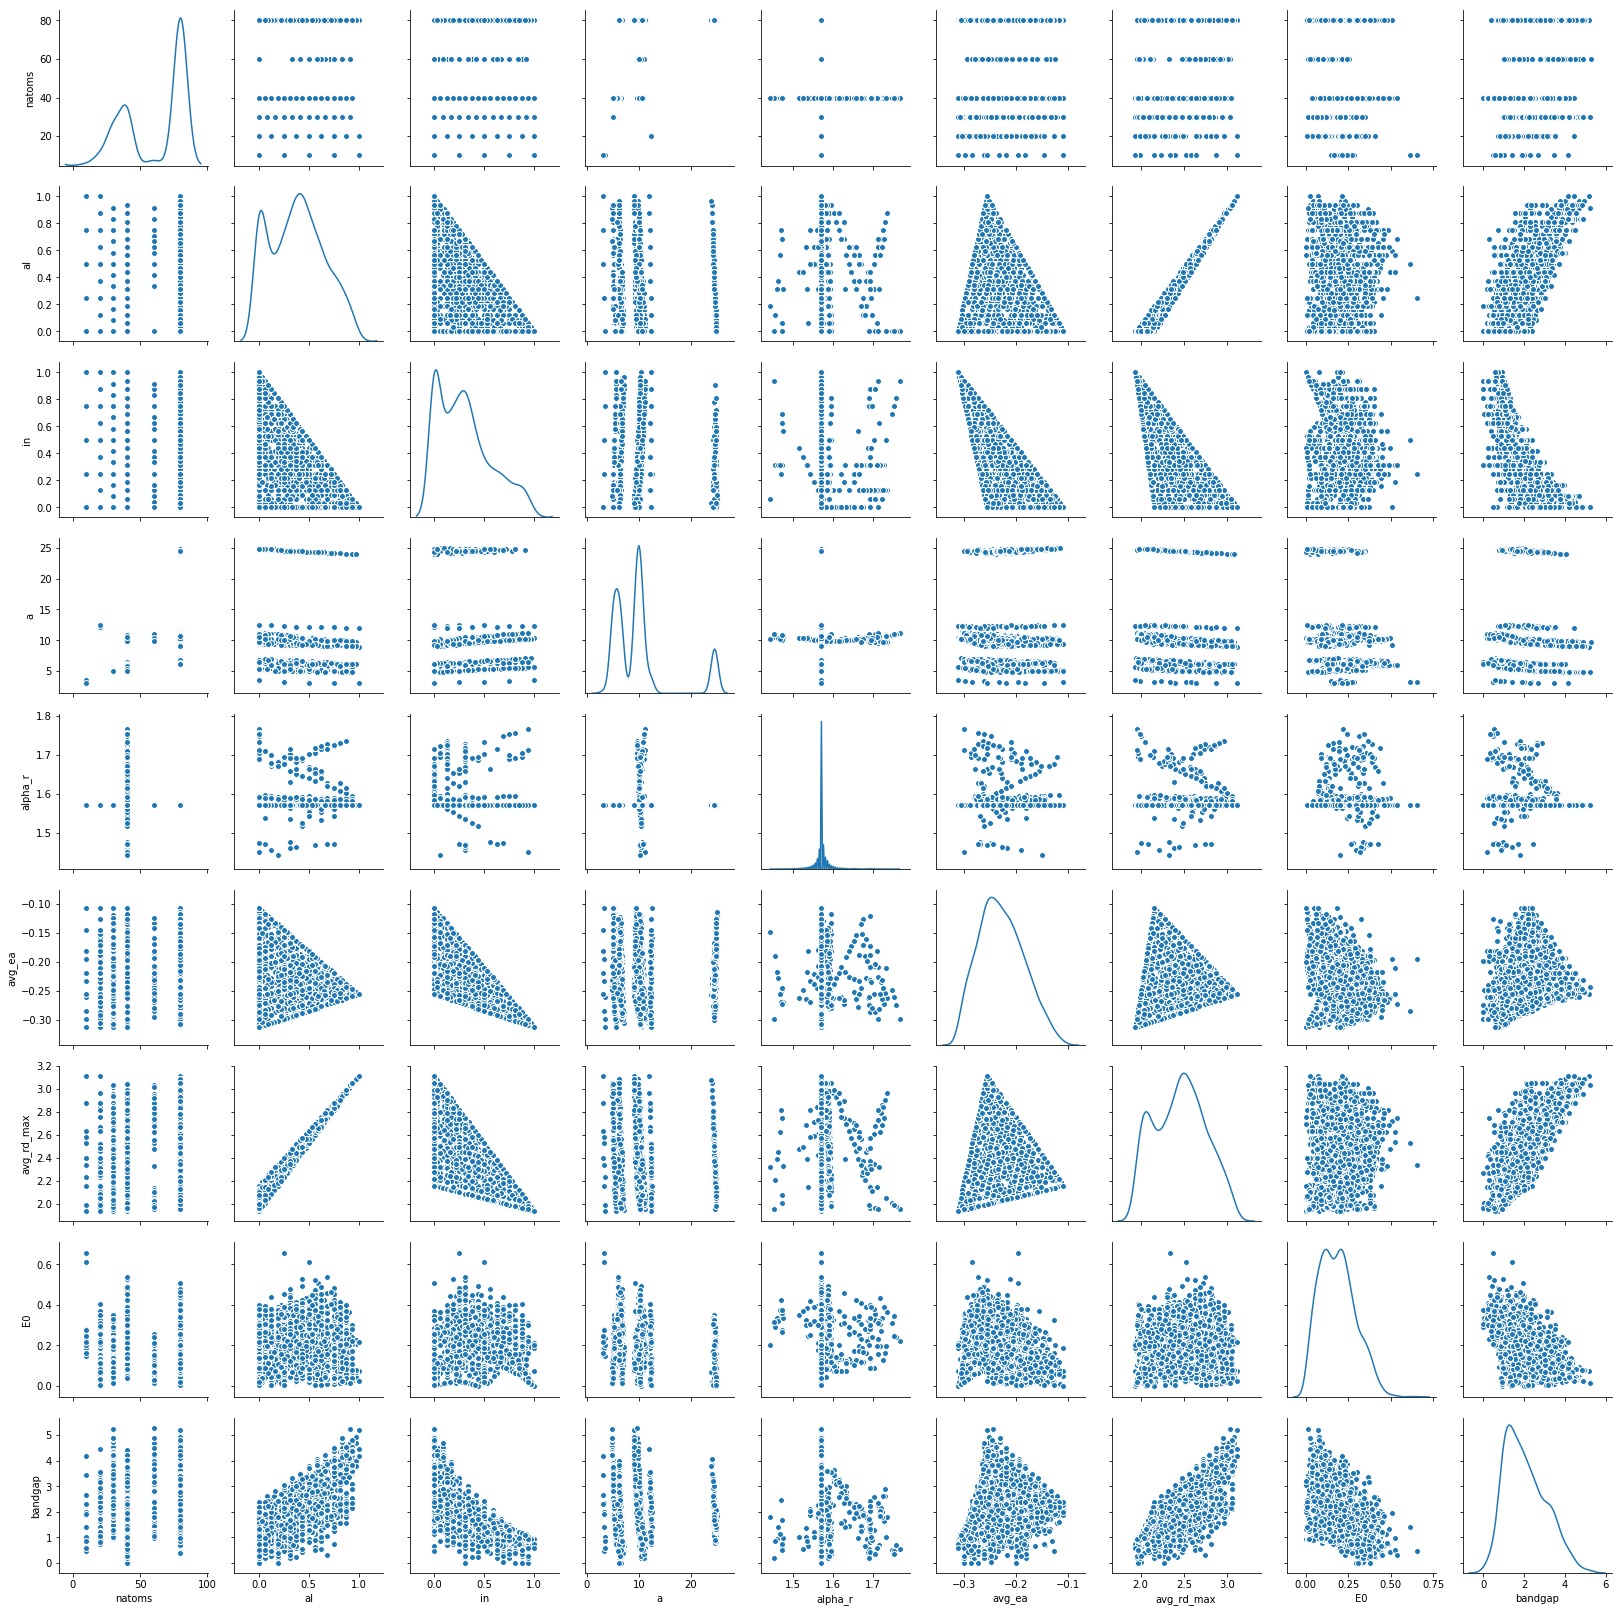

In [41]:
sns.pairplot(train[['natoms', 'al', 'in', 'a', 'alpha_r', 'avg_ea', 'avg_rd_max', 'E0', 'bandgap']],
             diag_kind='kde');

#### Correlation maps

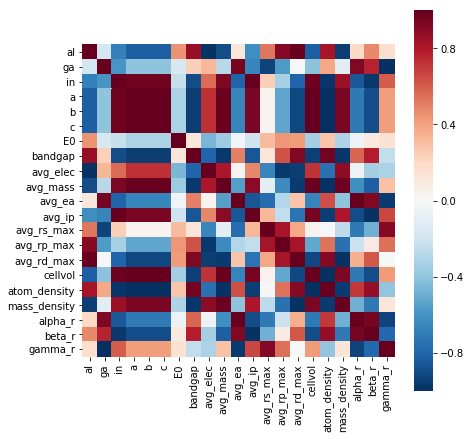

In [43]:
corr = train[train['spacegroup'] == 206].drop(['id', 'natoms', 'o_cnt', 'spacegroup',
                                               'alpha', 'beta', 'gamma', 'o_fraction'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

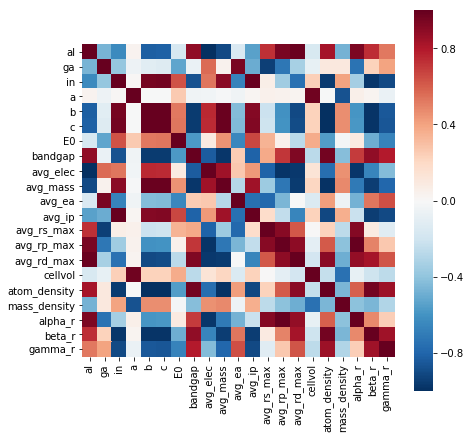

In [48]:
corr = train[train['spacegroup'] == 33].drop(['id', 'natoms', 'o_cnt', 'spacegroup',
                                              'alpha', 'beta', 'gamma', 'o_fraction'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

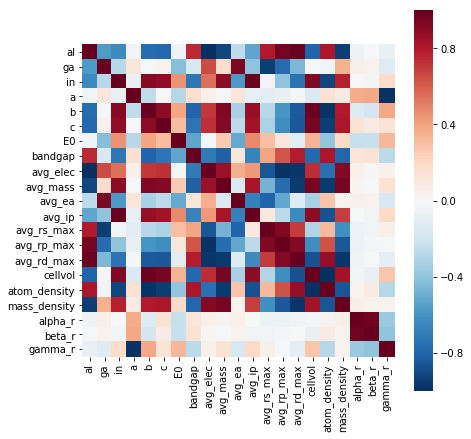

In [45]:
corr = train[train['spacegroup'] == 227].drop(['id', 'natoms', 'o_cnt', 'spacegroup',
                                               'alpha', 'beta', 'gamma', 'o_fraction'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

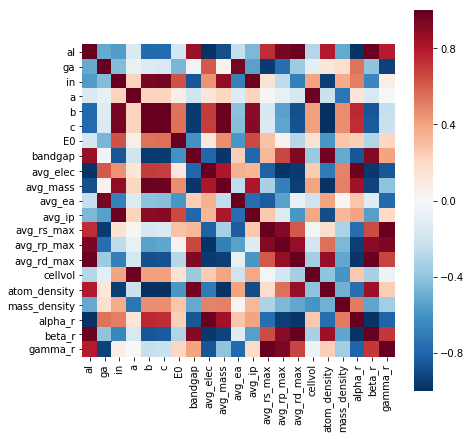

In [46]:
corr = train[train['spacegroup'] == 167].drop(['id', 'natoms', 'o_cnt', 'spacegroup',
                                               'alpha', 'beta', 'gamma', 'o_fraction'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

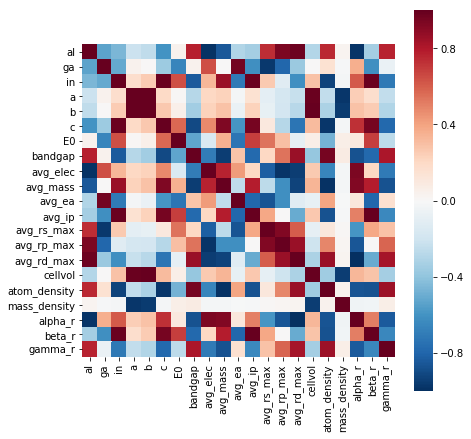

In [47]:
corr = train[train['spacegroup'] == 12].drop(['id', 'natoms', 'o_cnt', 'spacegroup',
                                              'alpha', 'beta', 'gamma', 'o_fraction'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

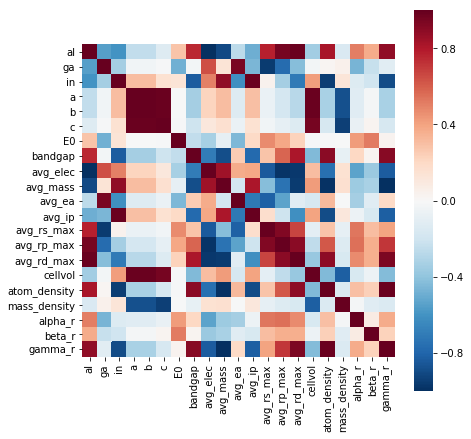

In [49]:
corr = train[train['spacegroup'] == 194].drop(['id', 'natoms', 'o_cnt', 'spacegroup',
                                               'alpha', 'beta', 'gamma', 'o_fraction'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

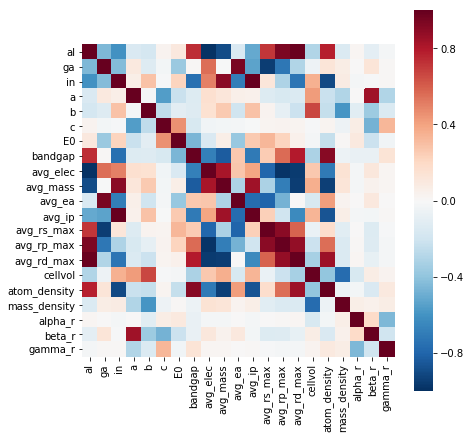

In [50]:
corr = train.drop(['id', 'natoms', 'o_cnt', 'spacegroup',
                   'alpha', 'beta', 'gamma', 'o_fraction'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

#### Lattice parameter trends

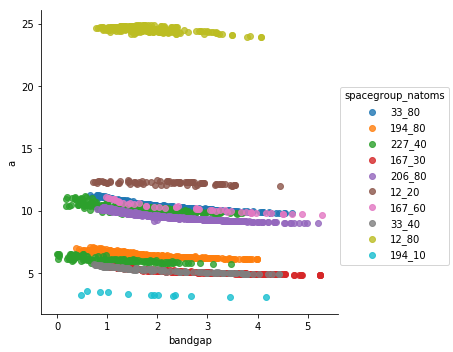

In [51]:
sns.lmplot(x='bandgap', y='a', data=train, hue='spacegroup_natoms', fit_reg=False);

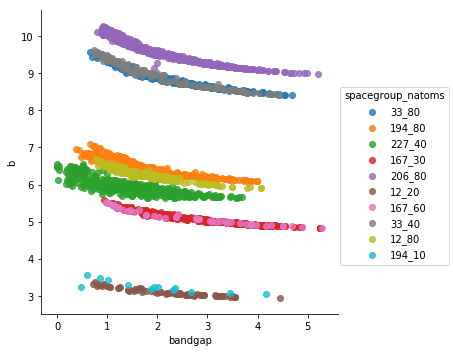

In [52]:
sns.lmplot(x='bandgap', y='b', data=train, hue='spacegroup_natoms', fit_reg=False);

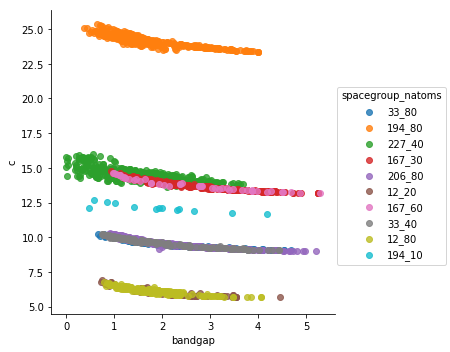

In [53]:
sns.lmplot(x='bandgap', y='c', data=train, hue='spacegroup_natoms', fit_reg=False);

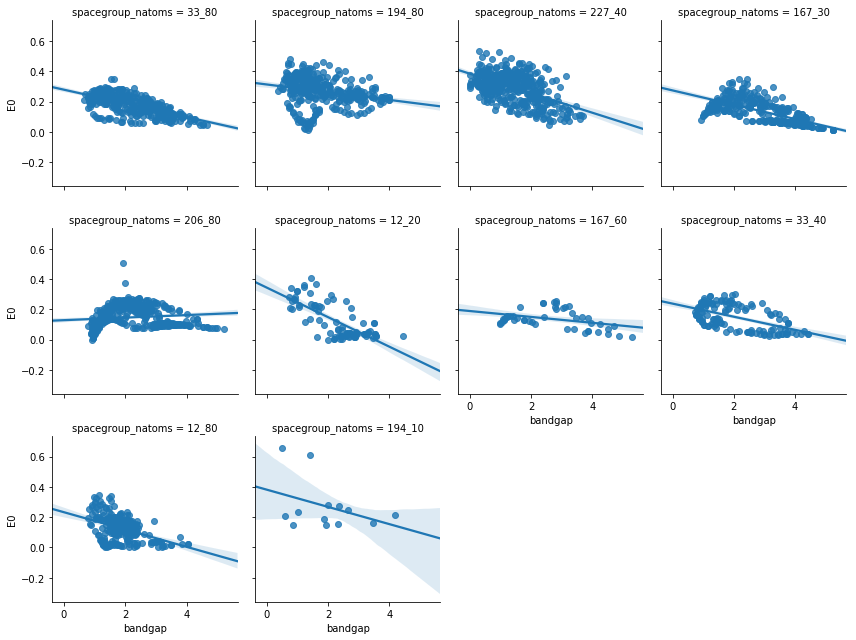

In [54]:
sns.lmplot(x='bandgap', y='E0', data=train, col='spacegroup_natoms', col_wrap=4, size=3);